In [37]:
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
from io import BytesIO
import requests
from numpy import uint8

from pickle import dump

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
def show_image(oneDArray):
    a = np.array(oneDArray)
    a = np.resize(a, (64,64,3))
    image2 = Image.fromarray(a.astype('uint8'))
    image2.show()

In [7]:
songList = pd.read_csv('../data/1photoSongList.csv')

In [8]:
songList

,genre,songName,artistName,0,1,2,3,4,5,6,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,Hip-Hop,COOLER THAN A BITCH (feat. Roddy Ricch),Gunna,162,82,107,160,82,106,157,...,99,166,102,100,164,103,100,164,103,100
1,Hip-Hop,Flex (feat. Juice WRLD),Polo G,18,18,18,15,15,15,17,...,17,6,6,6,0,0,0,12,12,12
2,Hip-Hop,Chicago Freestyle (feat. Giveon),Drake,13,26,8,14,27,9,14,...,10,13,30,11,13,32,12,14,33,13
3,Hip-Hop,Need It,Migos,48,44,6,48,45,4,45,...,35,19,14,11,9,5,0,13,6,0
4,Hip-Hop,DOLLAZ ON MY HEAD (feat. Young Thug),Gunna,162,82,107,160,82,106,157,...,99,166,102,100,164,103,100,164,103,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,Dance/Electronic,Never Let You Down,King Arthur,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10412,Dance/Electronic,Lovers For The Weekend,John De Sohn,107,36,92,107,37,91,110,...,37,33,32,37,31,29,34,38,36,41
10413,Dance/Electronic,Wanna Go Dancin,FISHER,1,0,5,0,0,0,0,...,0,2,2,4,0,0,2,0,0,2
10414,Dance/Electronic,Stereo Love - Dark Rehab Remix,Edward Maya,2,9,63,0,9,62,0,...,60,0,2,61,2,4,61,0,7,62


In [9]:
songListGroupby = songList.groupby(['genre'])

In [10]:
songListGroupby.mean()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
genre,,,,,,,,,,,,,,,,,,,,,
Country,128.980346,123.493215,116.561535,129.413196,123.760412,116.899392,130.724380,124.642489,117.815629,131.826392,...,98.600374,117.455311,107.011699,99.148339,116.248479,105.856341,97.520356,115.717829,106.097801,97.832943
Dance/Electronic,96.509495,90.147754,93.628995,95.825382,90.200556,93.515980,95.549792,90.012969,93.192219,96.552107,...,91.154701,97.253821,90.411302,90.867068,97.631774,90.251042,90.776748,97.599815,90.758221,90.835109
Hip-Hop,109.276755,103.807367,103.428074,110.055749,104.256844,103.225983,109.338975,103.238427,102.481334,108.840219,...,90.841215,101.708313,94.065207,91.877053,101.722748,94.626182,92.105027,101.694375,94.719263,92.451468
Pop,128.676218,122.911175,120.289876,128.721585,122.762655,119.892073,129.439351,122.874403,120.279370,129.592646,...,107.043935,122.853868,111.671442,106.554441,122.819007,111.406399,106.332856,122.418816,111.256447,106.606495
R&B,118.547348,107.213684,105.428359,118.542885,106.755082,104.594943,119.436787,107.643530,105.579078,119.752107,...,92.692117,108.194844,94.809122,92.254834,108.545860,95.556767,92.311849,110.175012,97.199306,94.329202


In [11]:
show_image(songListGroupby.mean().iloc[0,:])

In [12]:
show_image(songListGroupby.mean().iloc[1,:])

In [13]:
show_image(songListGroupby.mean().iloc[2,:])

In [14]:
show_image(songList.iloc[100,3:])

In [15]:
def pca_generator(n):
    rnd_pca = PCA(n_components = n, svd_solver="randomized")
    rnd_pca.fit(songList.iloc[:,3:])
    return rnd_pca.explained_variance_ratio_

In [16]:
currPCA = pca_generator(1000)

In [17]:
np.cumsum(currPCA)

array([0.42672906, 0.47614766, 0.52293408, 0.56420159, 0.58749394,
       0.60918493, 0.62435012, 0.63631355, 0.64764306, 0.65714669,
       0.66621493, 0.67430487, 0.68196383, 0.68929416, 0.69552127,
       0.70160523, 0.70689067, 0.71191076, 0.716823  , 0.72131476,
       0.72555298, 0.72969321, 0.73373894, 0.73750464, 0.74110398,
       0.74445524, 0.74753114, 0.75051246, 0.75326192, 0.75586248,
       0.75841723, 0.76088603, 0.76335412, 0.76571535, 0.76801825,
       0.77015116, 0.77217759, 0.77415637, 0.77609233, 0.77795419,
       0.77978436, 0.78156852, 0.78328719, 0.78495188, 0.78660965,
       0.78819778, 0.78975048, 0.79126639, 0.79276227, 0.79423459,
       0.79568687, 0.7971254 , 0.79853129, 0.79987772, 0.80122383,
       0.80252135, 0.80380699, 0.80508319, 0.8063356 , 0.80754315,
       0.80873169, 0.80989645, 0.81103165, 0.81213748, 0.81323227,
       0.81430656, 0.81536   , 0.81640235, 0.81742906, 0.81844533,
       0.81943132, 0.82039913, 0.82135466, 0.82229567, 0.82323

In [18]:
for x in range(len(np.cumsum(currPCA))):
    print(x," - ", np.cumsum(currPCA)[x])

0  -  0.42672905849979287
1  -  0.47614766397646724
2  -  0.5229340825556157
3  -  0.5642015926492169
4  -  0.587493941923465
5  -  0.6091849304046998
6  -  0.6243501204551336
7  -  0.6363135503865497
8  -  0.6476430570352055
9  -  0.6571466883034192
10  -  0.6662149291632341
11  -  0.6743048749302663
12  -  0.6819638328922892
13  -  0.6892941608613087
14  -  0.6955212745455119
15  -  0.7016052283756852
16  -  0.706890669254889
17  -  0.7119107648923721
18  -  0.716823002532035
19  -  0.7213147594101805
20  -  0.7255529836490493
21  -  0.7296932109963384
22  -  0.7337389440425542
23  -  0.7375046425787182
24  -  0.7411039809154235
25  -  0.7444552395248766
26  -  0.7475311443279486
27  -  0.750512457625207
28  -  0.7532619214733193
29  -  0.7558624766202983
30  -  0.7584172324285562
31  -  0.7608860326605906
32  -  0.7633541176056058
33  -  0.7657153490967071
34  -  0.7680182512300603
35  -  0.7701511636116571
36  -  0.7721775912641228
37  -  0.7741563730114588
38  -  0.776092332191843

521  -  0.939334439870062
522  -  0.939429075614145
523  -  0.9395235102466627
524  -  0.9396176882417313
525  -  0.9397116762793353
526  -  0.9398055266974755
527  -  0.9398991833747429
528  -  0.9399926595228083
529  -  0.9400860572691718
530  -  0.9401792286880599
531  -  0.940272213159746
532  -  0.9403646986956087
533  -  0.9404570635990316
534  -  0.9405492833432263
535  -  0.9406412285897103
536  -  0.9407329161803338
537  -  0.9408243248272249
538  -  0.9409155887813916
539  -  0.9410066744416311
540  -  0.9410975672049944
541  -  0.941188090244932
542  -  0.9412785773410485
543  -  0.9413690068327354
544  -  0.9414593257236962
545  -  0.9415492597491701
546  -  0.941638928109758
547  -  0.9417283519212782
548  -  0.9418176108396014
549  -  0.9419065819919377
550  -  0.9419954461587856
551  -  0.9420840452627155
552  -  0.9421722441994753
553  -  0.9422603049752473
554  -  0.9423480675490405
555  -  0.942435634153921
556  -  0.9425230480240316
557  -  0.9426102250486204
558  - 

In [19]:
X = songList.iloc[:,3:]
y = songList['genre']
Xnp = np.asarray(X)
ynp = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(Xnp, ynp, test_size=0.2, random_state=0)
X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=0)


In [20]:
rnd_pca = PCA(n_components = 652, svd_solver="randomized")
X_training = rnd_pca.fit_transform(X_training)
X_validation = rnd_pca.transform(X_validation)
X_test = rnd_pca.transform(X_test)

In [21]:
def heatmap(pred_vals, actual_vals):
    data = {'y_Actual':    actual_vals,
                'y_Predicted': pred_vals
                }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)*100
    sns.heatmap(confusion_matrix, annot=True,fmt='.3g')
    plt.tight_layout()
    plt.show()

In [22]:
def scoreDataGraph(scoreData):
    print(scoreData.iloc[scoreData['validation_score'].idxmax,:])
    g = sns.regplot(x='num_steps',y='crossval_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Cross Validation")
    g = sns.regplot(x='num_steps',y='validation_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Testing")
    g = sns.regplot(x='num_steps',y='training_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Training")
    g.set_ylabel("Score")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show(g)

# SGD Classifier

In [23]:
param_grid = [
    {'max_iter':[500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700],'tol':[1e-3]}
]

clf = linear_model.SGDClassifier()
clf.fit(X_training, y_training)
clf.score(X_validation, y_validation)
# grid_search = GridSearchCV(clf, param_grid, cv=5)
# grid_search.fit(X_train, y_train)


# grid_search.best_estimator_.score(X_train,y_train)


0.23763802208353338

In [24]:
for x in range(len(y_pred)):
    print(y_pred[x],np.array(y_test)[x])

NameError: name 'y_pred' is not defined

In [26]:
clf.score(X_training,y_training)

0.3181309009441511

# KNN

In [27]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_training, y_training)
neigh.score(X_training, y_training)
neigh.score(X_validation, y_validation)

0.4032645223235718

1
3
5
7
9
11
13
num_steps           1.000000
crossval_score      0.450151
validation_score    0.472396
training_score      0.948792
Name: 0, dtype: float64


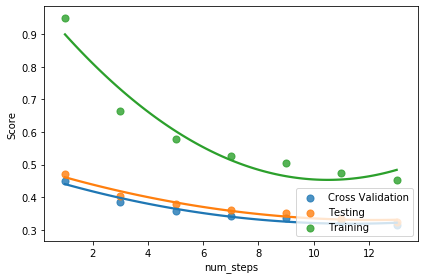

In [28]:
scoreData = pd.DataFrame(columns=['num_steps','crossval_score','validation_score','training_score'])


for x in range(1,14,2):
    print(x)
    neigh = KNeighborsClassifier(n_neighbors=x)
    scores = cross_val_score(neigh, X_training, y_training, cv=5)
    neigh.fit(X_training, y_training)
    
    scoreData.loc[len(scoreData)] = [x, scores.mean() , neigh.score(X_validation, y_validation), neigh.score(X_training, y_training)]

scoreDataGraph(scoreData)

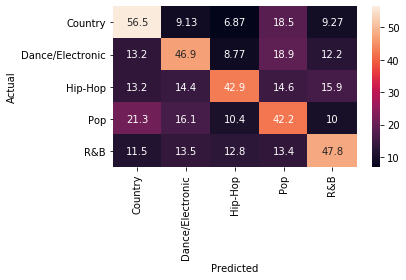

In [29]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_training, y_training)
heatmap(neigh.predict(X_validation),y_validation)

# KNN with no EDM

In [30]:
X_new = songList[songList['genre'] != 'Dance/Electronic'].iloc[:,3:]
y_new = songList[songList['genre'] != 'Dance/Electronic']['genre']
Xnp_new = np.asarray(X_new)
ynp_new = np.asarray(y_new)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(Xnp_new, ynp_new, test_size=0.2, random_state=0)
X_training_new, X_validation_new, y_training_new, y_validation_new = train_test_split(X_train_new, y_train_new, test_size=0.25, random_state=0)

In [31]:
rnd_pca_new = PCA(n_components = 652, svd_solver="randomized")
X_training_new = rnd_pca_new.fit_transform(X_training_new)
X_validation_new = rnd_pca_new.transform(X_validation_new)
X_test_new = rnd_pca_new.transform(X_test_new)

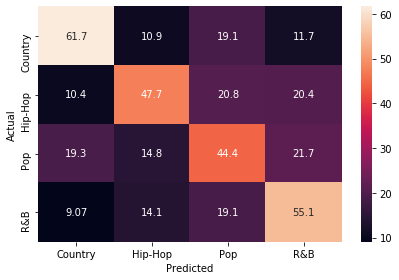

In [32]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_training_new, y_training_new)
heatmap(neigh.predict(X_validation_new),y_validation_new)

In [33]:
neigh.score(X_validation_new,y_validation_new)

0.5236077481840193

In [38]:
# save the model
dump(neigh, open('1photoKNN.pkl', 'wb'))

In [34]:
param_grid = [
    {'max_depth':[2,3,4,5,6,7,8,9,10],'random_state':[0]}
]

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_training_new, y_training_new)
print(grid_search.best_estimator_.score(X_training_new, y_training_new))
print(grid_search.best_estimator_.score(X_validation_new, y_validation_new))



0.8752271350696548
0.5320823244552058


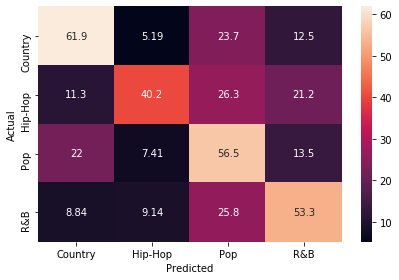

In [35]:
heatmap(grid_search.best_estimator_.predict(X_validation_new),y_validation_new)